In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchaudio
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from torchvision.transforms import ToTensor
from torchvision.datasets import CIFAR10
import torchaudio
from torchaudio.datasets import SPEECHCOMMANDS
from torch.utils.data import Dataset
from torch.nn.utils.rnn import pad_sequence
import cv2
import matplotlib.pyplot as plt
import numpy as np
from random import shuffle
from tqdm import tqdm
import scipy
import skimage
from skimage.transform import resize
from sklearn.model_selection import train_test_split

#### EDA ON PCAM DATASET

X --> images and Y --> labels

Generating the images of Test  

Available datasets: ['x']


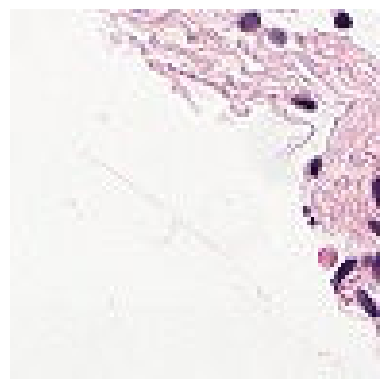

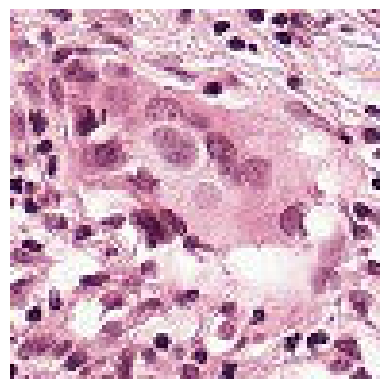

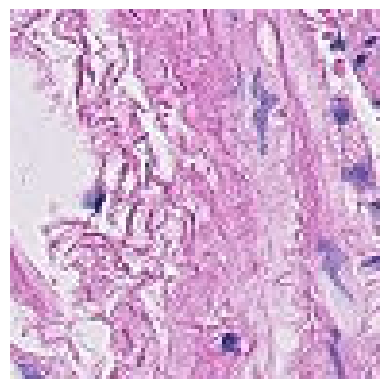

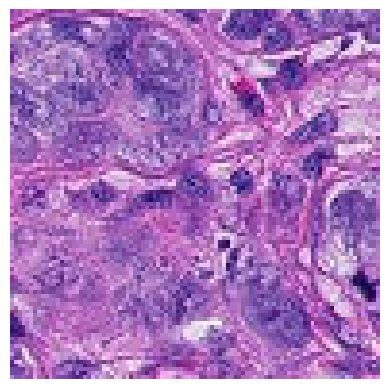

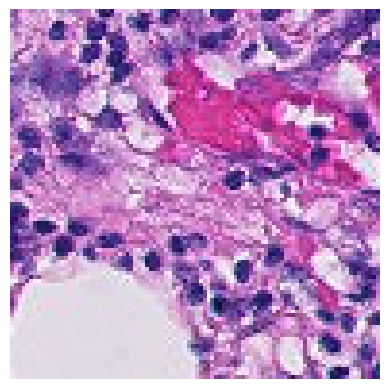

In [ ]:
import gzip
import shutil
import h5py
import os
import matplotlib.pyplot as plt

output_dir = '/content/drive/MyDrive/RMQ2

with gzip.open('/content/drive/MyDrive/pcamv1/camelyonpatch_level_2_split_test_x.h5.gz', 'rb') as f_in:
    with open(os.path.join(output_dir, 'camelyonpatch_level_2_split_test_x.h5'), 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

# Open the HDF5 file
with h5py.File(os.path.join(output_dir, 'camelyonpatch_level_2_split_test_x.h5'), 'r') as f:

    dataset_keys = list(f.keys())
    print("Available datasets:", dataset_keys)

    dataset_name = dataset_keys[0]
    images = f[dataset_name]

    for i in range(5):
        image_data = images[i]
        plt.imshow(image_data)
        plt.axis('off')
        plt.show()


Counting the number of images in Test

In [ ]:
import gzip
import shutil
import h5py

compressed_file_path = '/content/drive/MyDrive/pcamv1/camelyonpatch_level_2_split_test_x.h5.gz'
extracted_file_path = 'camelyonpatch_level_2_split_test_x.h5'

with gzip.open(compressed_file_path, 'rb') as f_in:
    with open(extracted_file_path, 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

with h5py.File(extracted_file_path, 'r') as f:

    dataset_name = list(f.keys())[0]
    images = f[dataset_name]

    num_images = images.shape[0]
    print("Number of images:", num_images)


Number of images: 32768


Dimension

In [ ]:
import gzip
import shutil
import h5py

compressed_file_path = '/content/drive/MyDrive/pcamv1/camelyonpatch_level_2_split_test_x.h5.gz'
extracted_file_path = 'camelyonpatch_level_2_split_test_x.h5'

with gzip.open(compressed_file_path, 'rb') as f_in:
    with open(extracted_file_path, 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

with h5py.File(extracted_file_path, 'r') as f:
    dataset_name = list(f.keys())[0]
    images = f[dataset_name]

    image_shape = images.shape
    print("Image dimensions (num_images, height, width, num_channels):", image_shape)


Image dimensions (num_images, height, width, num_channels): (32768, 96, 96, 3)


Pixel location

In [ ]:
import gzip
import shutil
import h5py

compressed_file_path = '/content/drive/MyDrive/pcamv1/camelyonpatch_level_2_split_test_x.h5.gz'
extracted_file_path = 'camelyonpatch_level_2_split_test_x.h5'

with gzip.open(compressed_file_path, 'rb') as f_in:
    with open(extracted_file_path, 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

with h5py.File(extracted_file_path, 'r') as f:

    dataset_name = list(f.keys())[0]
    images = f[dataset_name]

    first_image_pixels = images[0]
    print("Pixel values of the first image:")
    print(first_image_pixels)


Pixel values of the first image:
[[[247 246 244]
  [246 245 243]
  [246 245 243]
  ...
  [235 236 230]
  [251 250 248]
  [254 254 254]]

 [[247 246 244]
  [246 245 243]
  [246 245 243]
  ...
  [247 246 244]
  [245 243 244]
  [245 245 247]]

 [[247 246 244]
  [246 245 243]
  [246 245 243]
  ...
  [255 254 255]
  [243 241 244]
  [236 235 240]]

 ...

 [[244 244 242]
  [244 244 242]
  [244 244 242]
  ...
  [244 242 243]
  [245 243 244]
  [249 245 246]]

 [[243 243 241]
  [243 243 241]
  [244 244 242]
  ...
  [242 242 242]
  [243 241 242]
  [245 243 244]]

 [[243 243 241]
  [243 243 241]
  [244 244 242]
  ...
  [243 243 243]
  [241 241 243]
  [243 241 244]]]


First 10 labels of test

In [ ]:
import gzip
import shutil
import h5py

output_dir = '/content/drive/MyDrive/RMQ2'

with gzip.open('/content/drive/MyDrive/pcamv1/camelyonpatch_level_2_split_test_y.h5.gz', 'rb') as f_in:
    with open(os.path.join(output_dir, 'camelyonpatch_level_2_split_test_y.h5.gz'), 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

with h5py.File(os.path.join(output_dir, 'camelyonpatch_level_2_split_test_y.h5.gz'), 'r') as f:
    dataset_keys = list(f.keys())
    print("Available datasets:", dataset_keys)

    dataset_name = dataset_keys[0]
    labels = f[dataset_name][:]

    print("First 10 labels:", labels[:10])


Available datasets: ['y']
First 10 labels: [[[[0]]]


 [[[1]]]


 [[[0]]]


 [[[1]]]


 [[[1]]]


 [[[0]]]


 [[[1]]]


 [[[1]]]


 [[[1]]]


 [[[0]]]]


In [ ]:
import gzip
import shutil
import h5py

compressed_file_path = '/content/drive/MyDrive/pcamv1/camelyonpatch_level_2_split_test_y.h5.gz'
extracted_file_path = 'camelyonpatch_level_2_split_test_y.h5'

with gzip.open(compressed_file_path, 'rb') as f_in:
    with open(extracted_file_path, 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

with h5py.File(extracted_file_path, 'r') as f:

    dataset_name = list(f.keys())[0]
    labels = f[dataset_name]

    num_labels = labels.shape[0]
    print("Number of labels:", num_labels)


Number of labels: 32768


Number of labels in test

In [ ]:
import gzip
import shutil
import h5py

compressed_file_path = '/content/drive/MyDrive/pcamv1/camelyonpatch_level_2_split_test_x.h5.gz'
extracted_file_path = 'camelyonpatch_level_2_split_test_x.h5.gz'

with gzip.open(compressed_file_path, 'rb') as f_in:
    with open(extracted_file_path, 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

with h5py.File(extracted_file_path, 'r') as f:

    dataset_name = list(f.keys())[0]
    labels = f[dataset_name]

    num_labels = labels.shape[0]
    print("Number of labels:", num_labels)


Number of labels: 32768


Counting the number of images in Train

In [ ]:
import gzip
import shutil
import h5py

compressed_file_path = '/content/drive/MyDrive/pcamv1/camelyonpatch_level_2_split_train_x.h5.gz'
extracted_file_path = 'camelyonpatch_level_2_split_train_x.h5.gz'

with gzip.open(compressed_file_path, 'rb') as f_in:
    with open(extracted_file_path, 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

with h5py.File(extracted_file_path, 'r') as f:

    dataset_name = list(f.keys())[0]
    images = f[dataset_name]

    num_images = images.shape[0]
    print("Number of images:", num_images)


Number of images: 262144


Dimension

In [ ]:
import gzip
import shutil
import h5py

compressed_file_path = '/content/drive/MyDrive/pcamv1/camelyonpatch_level_2_split_train_x.h5.gz'
extracted_file_path = 'camelyonpatch_level_2_split_train_x.h5'

with gzip.open(compressed_file_path, 'rb') as f_in:
    with open(extracted_file_path, 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

with h5py.File(extracted_file_path, 'r') as f:

    dataset_name = list(f.keys())[0]
    images = f[dataset_name]

    image_shape = images.shape
    print("Image dimensions (num_images, height, width, num_channels):", image_shape)


Image dimensions (num_images, height, width, num_channels): (262144, 96, 96, 3)


Pixel values

In [ ]:
import gzip
import shutil
import h5py

compressed_file_path = '/content/drive/MyDrive/pcamv1/camelyonpatch_level_2_split_train_x.h5.gz'
extracted_file_path = 'camelyonpatch_level_2_split_train_x.h5'

with gzip.open(compressed_file_path, 'rb') as f_in:
    with open(extracted_file_path, 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

with h5py.File(extracted_file_path, 'r') as f:

    dataset_name = list(f.keys())[0]
    images = f[dataset_name]

    first_image_pixels = images[0]
    print("Pixel values of the first image:")
    print(first_image_pixels)


Pixel values of the first image:
[[[226 209 225]
  [224 210 225]
  [223 211 223]
  ...
  [218 178 230]
  [214 182 221]
  [188 161 192]]

 [[223 209 224]
  [222 210 224]
  [221 211 222]
  ...
  [127  87 150]
  [159 126 181]
  [204 176 225]]

 [[222 210 224]
  [221 210 224]
  [219 211 222]
  ...
  [ 77  38 117]
  [ 42   8  84]
  [137 107 179]]

 ...

 [[123  81 165]
  [128  90 173]
  [126  91 173]
  ...
  [203 135 210]
  [226 155 223]
  [202 130 194]]

 [[ 90  52 139]
  [ 90  56 142]
  [ 79  45 131]
  ...
  [216 152 230]
  [179 113 185]
  [217 152 220]]

 [[ 85  51 138]
  [101  68 155]
  [ 91  59 144]
  ...
  [200 136 220]
  [204 142 217]
  [192 130 203]]]


Labels

In [ ]:
import gzip
import shutil
import h5py

output_dir = '/content/drive/MyDrive/RMQ2'

with gzip.open('/content/drive/MyDrive/pcamv1/camelyonpatch_level_2_split_train_y.h5.gz', 'rb') as f_in:
    with open(os.path.join(output_dir, 'camelyonpatch_level_2_split_train_y.h5.gz'), 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

with h5py.File(os.path.join(output_dir, 'camelyonpatch_level_2_split_train_y.h5.gz'), 'r') as f:
    dataset_keys = list(f.keys())
    print("Available datasets:", dataset_keys)

    dataset_name = dataset_keys[0]
    labels = f[dataset_name][:]

    print("First 10 labels:", labels[:10])

Available datasets: ['y']
First 10 labels: [[[[0]]]


 [[[1]]]


 [[[1]]]


 [[[1]]]


 [[[0]]]


 [[[0]]]


 [[[0]]]


 [[[1]]]


 [[[1]]]


 [[[1]]]]


Number of labels

In [ ]:
import gzip
import shutil
import h5py

compressed_file_path = '/content/drive/MyDrive/pcamv1/camelyonpatch_level_2_split_train_y.h5.gz'
extracted_file_path = 'camelyonpatch_level_2_split_train_y.h5'

with gzip.open(compressed_file_path, 'rb') as f_in:
    with open(extracted_file_path, 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

with h5py.File(extracted_file_path, 'r') as f:
    dataset_name = list(f.keys())[0]
    labels = f[dataset_name]

    num_labels = labels.shape[0]
    print("Number of labels:", num_labels)


Number of labels: 262144


Loading the Validation images

Available datasets: ['x']


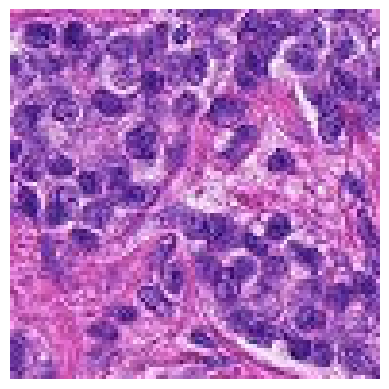

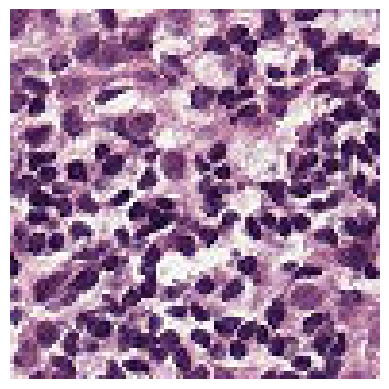

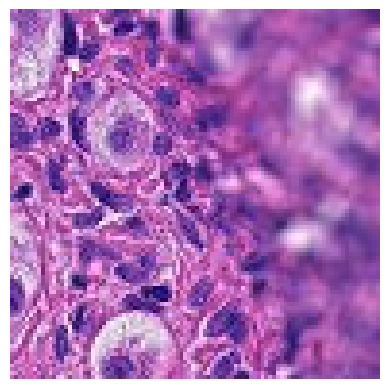

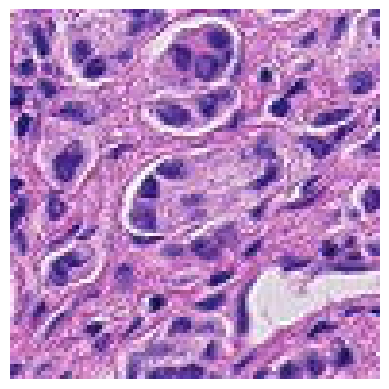

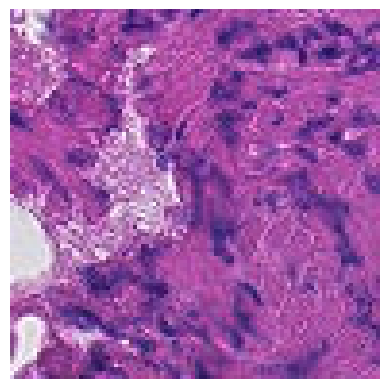

In [ ]:
import gzip
import shutil
import h5py
import os
import matplotlib.pyplot as plt

output_dir = '/content/drive/MyDrive/RMQ2'

with gzip.open('/content/drive/MyDrive/pcamv1/camelyonpatch_level_2_split_valid_x.h5.gz', 'rb') as f_in:
    with open(os.path.join(output_dir, 'camelyonpatch_level_2_split_valid_x.h5.gz'), 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

with h5py.File(os.path.join(output_dir,'camelyonpatch_level_2_split_valid_x.h5.gz'), 'r') as f:
    dataset_keys = list(f.keys())
    print("Available datasets:", dataset_keys)

    dataset_name = dataset_keys[0]
    images = f[dataset_name]

    for i in range(5):
        image_data = images[i]
        plt.imshow(image_data)
        plt.axis('off')  # Hide axis
        plt.show()


Number of images in validation

In [ ]:
import gzip
import shutil
import h5py

compressed_file_path = '/content/drive/MyDrive/pcamv1/camelyonpatch_level_2_split_valid_y.h5.gz'
extracted_file_path = 'camelyonpatch_level_2_split_valid_y.h5.gz'

with gzip.open(compressed_file_path, 'rb') as f_in:
    with open(extracted_file_path, 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

with h5py.File(extracted_file_path, 'r') as f:
    dataset_name = list(f.keys())[0]
    images = f[dataset_name]

    num_images = images.shape[0]
    print("Number of images:", num_images)


Number of images: 32768


Dimension

In [ ]:
import gzip
import shutil
import h5py

compressed_file_path = '/content/drive/MyDrive/pcamv1/camelyonpatch_level_2_split_valid_x.h5.gz'
extracted_file_path = 'camelyonpatch_level_2_split_valid_x.h5'

with gzip.open(compressed_file_path, 'rb') as f_in:
    with open(extracted_file_path, 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

with h5py.File(extracted_file_path, 'r') as f:

    dataset_name = list(f.keys())[0]
    images = f[dataset_name]

    image_shape = images.shape
    print("Image dimensions (num_images, height, width, num_channels):", image_shape)


Image dimensions (num_images, height, width, num_channels): (32768, 96, 96, 3)


Pixel values

In [ ]:
import gzip
import shutil
import h5py

compressed_file_path = '/content/drive/MyDrive/pcamv1/camelyonpatch_level_2_split_valid_x.h5.gz'
extracted_file_path = 'camelyonpatch_level_2_split_valid_x.h5'

with gzip.open(compressed_file_path, 'rb') as f_in:
    with open(extracted_file_path, 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

with h5py.File(extracted_file_path, 'r') as f:

    dataset_name = list(f.keys())[0]
    images = f[dataset_name]

    first_image_pixels = images[0]
    print("Pixel values of the first image:")
    print(first_image_pixels)


Pixel values of the first image:
[[[224 111 191]
  [239 130 209]
  [230 127 206]
  ...
  [152  82 170]
  [224 147 225]
  [212 131 200]]

 [[177  63 150]
  [188  78 164]
  [177  73 158]
  ...
  [215 145 234]
  [224 147 227]
  [215 135 208]]

 [[208  99 192]
  [194  87 181]
  [173  70 162]
  ...
  [176 105 197]
  [203 128 210]
  [211 133 208]]

 ...

 [[ 88  31 134]
  [ 94  38 137]
  [137  82 176]
  ...
  [158  99 189]
  [110  50 140]
  [119  58 151]]

 [[155  95 193]
  [132  75 170]
  [ 85  29 118]
  ...
  [121  63 148]
  [ 97  38 128]
  [127  68 160]]

 [[151  90 185]
  [131  72 164]
  [115  57 142]
  ...
  [166 108 192]
  [122  64 151]
  [ 81  25 114]]]


Labels

In [ ]:
import gzip
import shutil
import h5py

output_dir = '/content/drive/MyDrive/RMQ2'

with gzip.open('/content/drive/MyDrive/pcamv1/camelyonpatch_level_2_split_valid_y.h5.gz', 'rb') as f_in:
    with open(os.path.join(output_dir, 'camelyonpatch_level_2_split_valid_y.h5.gz'), 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

with h5py.File(os.path.join(output_dir, 'camelyonpatch_level_2_split_valid_y.h5.gz'), 'r') as f:

    dataset_keys = list(f.keys())
    print("Available datasets:", dataset_keys)

    dataset_name = dataset_keys[0]
    labels = f[dataset_name][:]
    print("First 10 labels:", labels[:10])


Available datasets: ['y']
First 10 labels: [[[[1]]]


 [[[1]]]


 [[[1]]]


 [[[1]]]


 [[[1]]]


 [[[1]]]


 [[[0]]]


 [[[1]]]


 [[[1]]]


 [[[1]]]]


Number of labels

In [ ]:
import gzip
import shutil
import h5py

compressed_file_path = '/content/drive/MyDrive/pcamv1/camelyonpatch_level_2_split_valid_y.h5.gz'
extracted_file_path = 'camelyonpatch_level_2_split_valid_y.h5'

with gzip.open(compressed_file_path, 'rb') as f_in:
    with open(extracted_file_path, 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

with h5py.File(extracted_file_path, 'r') as f:

    dataset_name = list(f.keys())[0]
    labels = f[dataset_name]

    num_labels = labels.shape[0]
    print("Number of labels:", num_labels)


Number of labels: 32768


#### Creating the PCAM Custom dataset, then dividing the images into 24 sizes patches that is segmentation


In [ ]:
import h5py
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image

class PCamDataset(Dataset):
    def __init__(self, h5_file, label_file, indices, transform=None):
        self.image_file = h5_file
        self.label_file = label_file
        self.indices = indices
        self.transform = transform

        with h5py.File(self.image_file, 'r') as f:
            self.images = f['x'][:]
        with h5py.File(self.label_file, 'r') as f:
            self.labels = f['y'][:]

    def __len__(self):
        return len(self.indices) * 16  # 16 patches per image

    def __getitem__(self, idx):
        image_idx = idx // 16  # Each image is divided into 16 patches
        patch_idx = idx % 16

        actual_idx = self.indices[image_idx]
        x = self.images[actual_idx]
        y = self.labels[actual_idx]

        x = Image.fromarray(x)

        # Get the coordinates for the 24x24 patch
        row = (patch_idx // 4) * 24
        col = (patch_idx % 4) * 24
        x = x.crop((col, row, col + 24, row + 24))

        if self.transform:
            x = self.transform(x)

        return x, y

np.random.seed(42)

with h5py.File('/content/camelyonpatch_level_2_split_train_y.h5', 'r') as f:
    labels = f['y'][:]

# Select 5,000 cancerous (label=1) and 5,000 non-cancerous (label=0) indices for training
cancerous_indices_train = np.where(labels == 1)[0][:5000]
non_cancerous_indices_train = np.where(labels == 0)[0][:5000]
sampled_indices_train = np.concatenate((cancerous_indices_train, non_cancerous_indices_train))
np.random.shuffle(sampled_indices_train)

with h5py.File('/content/camelyonpatch_level_2_split_valid_y.h5.gz', 'r') as f:
    labels_val = f['y'][:]

cancerous_indices_val = np.where(labels_val == 1)[0][:5000]
non_cancerous_indices_val = np.where(labels_val == 0)[0][:5000]
sampled_indices_val = np.concatenate((cancerous_indices_val, non_cancerous_indices_val))
np.random.shuffle(sampled_indices_val)

with h5py.File('/content/camelyonpatch_level_2_split_test_y.h5', 'r') as f:
    labels_test = f['y'][:]

cancerous_indices_test = np.where(labels_test == 1)[0][:5000]
non_cancerous_indices_test = np.where(labels_test == 0)[0][:5000]
sampled_indices_test = np.concatenate((cancerous_indices_test, non_cancerous_indices_test))
np.random.shuffle(sampled_indices_test)

transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = PCamDataset('/content/camelyonpatch_level_2_split_train_x.h5',
                            '/content/camelyonpatch_level_2_split_train_y.h5',
                            indices=sampled_indices_train, transform=transform)

val_dataset = PCamDataset('/content/camelyonpatch_level_2_split_valid_x.h5',
                          '/content/camelyonpatch_level_2_split_valid_y.h5',
                          indices=sampled_indices_val, transform=transform)

test_dataset = PCamDataset('/content/camelyonpatch_level_2_split_test_x.h5',
                           '/content/camelyonpatch_level_2_split_test_y.h5',
                           indices=sampled_indices_test, transform=transform)

batch_size = 64

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


#### FEATURE EXTRACTION USING RESNET-18 MODEL

In [ ]:
import h5py
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torchvision.transforms as transforms
import torchvision.models as models
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, models, transforms
import torch.nn.functional as F

# Loading a pre-trained model
model = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)

# Modifying the first convolutional layer to accept 24x24 images
model.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
model.maxpool = nn.Identity()
model = nn.Sequential(*list(model.children())[:-1])

model.eval()

# extract features
def extract_features(data_loader, model, device):
    features = []
    labels = []
    with torch.no_grad():
        for inputs, targets in data_loader:
            inputs = inputs.to(device)
            targets = targets.to(device)
            outputs = model(inputs)
            outputs = outputs.view(outputs.size(0), -1)
            features.append(outputs.cpu().numpy())
            labels.append(targets.cpu().numpy())
    return np.concatenate(features), np.concatenate(labels)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

train_features, train_labels = extract_features(train_loader, model, device)
val_features, val_labels = extract_features(val_loader, model, device)
test_features, test_labels = extract_features(test_loader, model, device)

np.save('train_features.npy', train_features)
np.save('train_labels.npy', train_labels)
np.save('val_features.npy', val_features)
np.save('val_labels.npy', val_labels)
np.save('test_features.npy', test_features)
np.save('test_labels.npy', test_labels)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 91.3MB/s]


In [ ]:
# combine feature size
sample_feature, sample_label = train_dataset[0]
combined_feature_size = sample_feature.size(0)
print("Combined feature size:", combined_feature_size)

Combined feature size: 3


####MODEL TRAINING

First training the simple autoencoder with giving extra bits in encoder and decoder and also passing the features.



In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

class Autoencoder(nn.Module):
    def __init__(self, input_dim, encoding_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.ReLU(True),
            nn.Linear(512, 256),
            nn.ReLU(True),
            nn.Linear(256, encoding_dim),
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 256),
            nn.ReLU(True),
            nn.Linear(256, 512),
            nn.ReLU(True),
            nn.Linear(512, input_dim),
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Load features and labels
train_features = np.load('/content/drive/MyDrive/features autoencoder/train_features.npy')
train_labels = np.load('/content/drive/MyDrive/features autoencoder/train_labels.npy')
val_features = np.load('/content/drive/MyDrive/features autoencoder/val_features.npy')
val_labels = np.load('/content/drive/MyDrive/features autoencoder/val_labels.npy')
test_features = np.load('/content/drive/MyDrive/features autoencoder/test_features.npy')
test_labels = np.load('/content/drive/MyDrive/features autoencoder/test_labels.npy')


# Append the label as an extra bit to the feature vectors
train_features_with_labels = np.hstack((train_features, train_labels.reshape(-1, 1)))
val_features_with_labels = np.hstack((val_features, val_labels.reshape(-1, 1)))
test_features_with_labels = np.hstack((test_features, test_labels.reshape(-1, 1)))

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_dataset = TensorDataset(torch.tensor(train_features_with_labels, dtype=torch.float32), torch.tensor(train_labels, dtype=torch.float32))
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Initialize the autoencoder
combined_feature_size = train_features_with_labels.shape[1]
encoding_dim = 64
autoencoder = Autoencoder(input_dim=combined_feature_size, encoding_dim=encoding_dim).to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

num_epochs = 10
for epoch in range(num_epochs):
    for data, _ in train_loader:
        data = data.to(device)

        # Forward pass
        reconstructed = autoencoder(data)
        loss = criterion(reconstructed, data)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

print("Training complete")


Epoch [1/10], Loss: 0.0198
Epoch [2/10], Loss: 0.0157
Epoch [3/10], Loss: 0.0135
Epoch [4/10], Loss: 0.0119
Epoch [5/10], Loss: 0.0126
Epoch [6/10], Loss: 0.0122
Epoch [7/10], Loss: 0.0095
Epoch [8/10], Loss: 0.0133
Epoch [9/10], Loss: 0.0112
Epoch [10/10], Loss: 0.0105
Training complete


In [ ]:
print(val_labels.shape)


(160000, 1, 1, 1)


Tsne visualization of encoed features of the train autoenoder with train labels



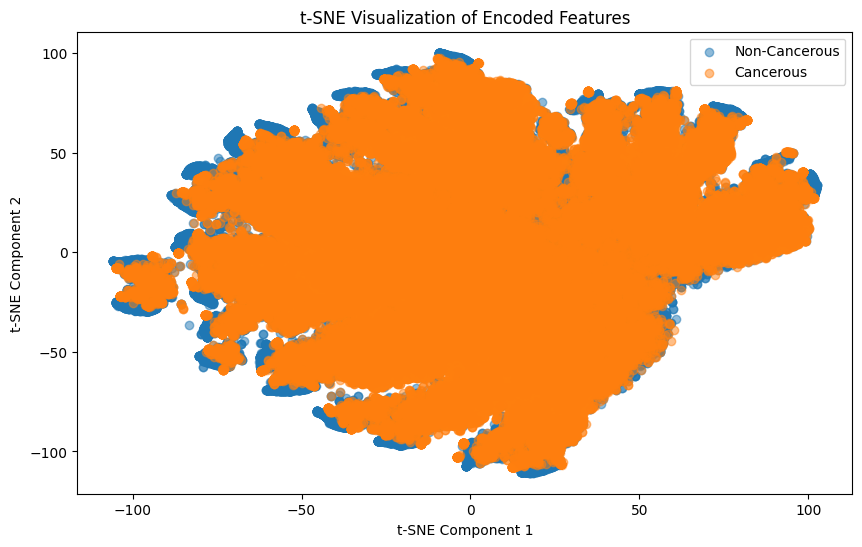

In [ ]:
import torch
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Visualize encoded features using t-SNE
encoded_features = autoencoder.encoder(torch.tensor(train_features_with_labels, dtype=torch.float32).to(device)).cpu().detach().numpy()
tsne = TSNE(n_components=2, random_state=42)
embedded_features = tsne.fit_transform(encoded_features)

train_labels = train_labels.squeeze()

plt.figure(figsize=(10, 6))
plt.scatter(embedded_features[train_labels == 0, 0], embedded_features[train_labels == 0, 1], label='Non-Cancerous', alpha=0.5)
plt.scatter(embedded_features[train_labels == 1, 0], embedded_features[train_labels == 1, 1], label='Cancerous', alpha=0.5)
plt.title('t-SNE Visualization of Encoded Features')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()


Tsne visualization of encoed features of the train autoenoder with validation labels



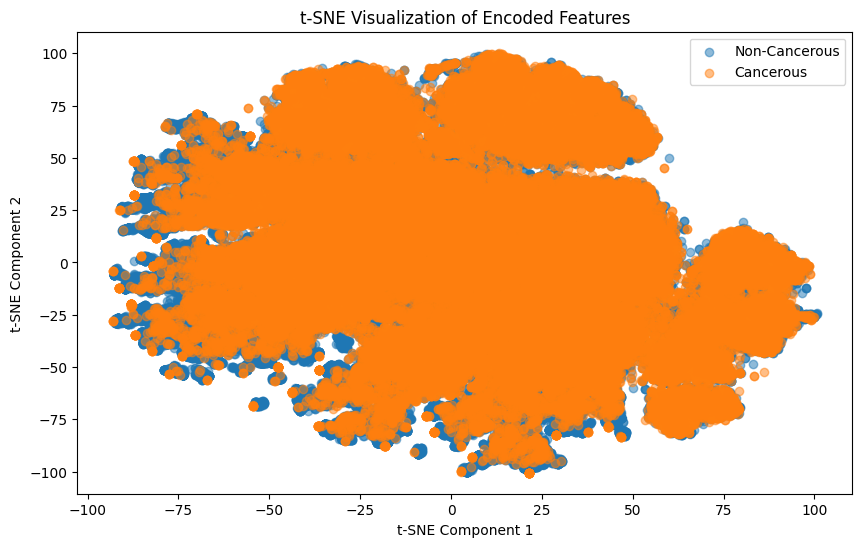

In [ ]:
import torch
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Visualize encoded features using t-SNE
encoded_features = autoencoder.encoder(torch.tensor(val_features_with_labels, dtype=torch.float32).to(device)).cpu().detach().numpy()
tsne = TSNE(n_components=2, random_state=42)
embedded_features = tsne.fit_transform(encoded_features)

val_labels = val_labels.squeeze()

plt.figure(figsize=(10, 6))
plt.scatter(embedded_features[val_labels == 0, 0], embedded_features[val_labels == 0, 1], label='Non-Cancerous', alpha=0.5)
plt.scatter(embedded_features[val_labels == 1, 0], embedded_features[val_labels == 1, 1], label='Cancerous', alpha=0.5)
plt.title('t-SNE Visualization of Encoded Features')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()


Training the autoenoder with expectaion maximzation technique and fuzzy-K-means

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

class Autoencoder_EM(nn.Module):
    def __init__(self, input_dim, encoding_dim):
        super(Autoencoder_EM, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.ReLU(True),
            nn.Linear(512, 256),
            nn.ReLU(True),
            nn.Linear(256, encoding_dim),
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 256),
            nn.ReLU(True),
            nn.Linear(256, 512),
            nn.ReLU(True),
            nn.Linear(512, input_dim),
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

def fuzzy_k_means(X, centroids, m=2):
    distances = cdist(X, centroids, 'euclidean')
    distances = np.fmax(distances, np.finfo(np.float64).eps)
    inv_distances = 1.0 / distances
    weights = inv_distances ** (2.0 / (m - 1))
    return weights / weights.sum(axis=1, keepdims=True)

def update_centroids(X, weights, n_clusters):
    return np.dot(weights.T, X) / np.sum(weights, axis=0)[:, None]

def expectation_step(data, autoencoder, n_clusters, device):
    autoencoder.eval()
    with torch.no_grad():
        encoded_features = autoencoder.encoder(torch.tensor(data, dtype=torch.float32).to(device)).cpu().numpy()

    centroids = encoded_features[:n_clusters]  # Initializing the centroids
    weights = fuzzy_k_means(encoded_features, centroids)
    return weights, centroids, encoded_features

def maximization_step(train_loader, autoencoder, combined_criterion, optimizer, weights, centroids, encoded_features, n_clusters, device):
    autoencoder.train()

    centroids = update_centroids(encoded_features, weights, n_clusters)

    total_loss = 0.0
    for data, labels in train_loader:
        data = data.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()

        reconstructed = autoencoder(data)

        # Split the data into features and labels
        original_features = data[:, :-1]
        original_labels = data[:, -1].view(-1, 1)
        reconstructed_features = reconstructed[:, :-1]
        reconstructed_labels = reconstructed[:, -1].view(-1, 1)

        # Compute combined loss
        loss = combined_criterion(reconstructed_features, original_features, reconstructed_labels, original_labels)

        # Compute clustering loss
        encoded_data = autoencoder.encoder(data).detach().cpu().numpy()
        batch_size = data.size(0)
        clustering_loss = 0.0

        for i in range(batch_size):
            for j in range(n_clusters):
                clustering_loss += weights[i, j] * torch.norm(torch.tensor(encoded_data[i]).to(device) - torch.tensor(centroids[j]).to(device))

        total_loss = loss + clustering_loss
        total_loss.backward()
        optimizer.step()

    return centroids, total_loss

def combined_criterion(reconstructed_features, original_features, reconstructed_labels, original_labels):
    mse_loss = nn.MSELoss()(reconstructed_features, original_features)
    bce_loss = nn.BCEWithLogitsLoss()(reconstructed_labels, original_labels)
    return mse_loss + bce_loss

def expectation_maximization(train_loader, autoencoder, combined_criterion, optimizer, train_features_with_labels, device, n_clusters=2, max_iterations=10):
    for iteration in range(max_iterations):
        weights, centroids, encoded_features = expectation_step(train_features_with_labels, autoencoder, n_clusters, device)
        centroids, total_loss = maximization_step(train_loader, autoencoder, combined_criterion, optimizer, weights, centroids, encoded_features, n_clusters, device)

        print(f'Iteration [{iteration+1}/{max_iterations}], Loss: {total_loss.item():.4f}')

        if total_loss.item() < 1e-4:
            break

    return autoencoder

def main():
    train_features = np.load('/content/drive/MyDrive/features autoencoder/train_features.npy')
    train_labels = np.load('/content/drive/MyDrive/features autoencoder/train_labels.npy')
    val_features = np.load('/content/drive/MyDrive/features autoencoder/val_features.npy')
    val_labels = np.load('/content/drive/MyDrive/features autoencoder/val_labels.npy')
    test_features = np.load('/content/drive/MyDrive/features autoencoder/test_features.npy')
    test_labels = np.load('/content/drive/MyDrive/features autoencoder/test_labels.npy')

    train_features_with_labels = np.hstack((train_features, train_labels.reshape(-1, 1)))
    val_features_with_labels = np.hstack((val_features, val_labels.reshape(-1, 1)))
    test_features_with_labels = np.hstack((test_features, test_labels.reshape(-1, 1)))

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    train_dataset = TensorDataset(torch.tensor(train_features_with_labels, dtype=torch.float32), torch.tensor(train_labels, dtype=torch.float32))
    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

    combined_feature_size = train_features_with_labels.shape[1]
    encoding_dim = 64
    autoencoder = Autoencoder_EM(input_dim=combined_feature_size, encoding_dim=encoding_dim).to(device)
    optimizer = optim.Adam(autoencoder.parameters(), lr=1e-3)

    # Run EM algorithm
    trained_model = expectation_maximization(train_loader, autoencoder, combined_criterion, optimizer, train_features_with_labels, device)

    torch.save(trained_model.state_dict(), 'em_trained_model.pth')

if __name__ == "__main__":
    main()


Iteration [1/10], Loss: 351.9691
Iteration [2/10], Loss: 233.3143
Iteration [3/10], Loss: 502.9623
Iteration [4/10], Loss: 471.1812
Iteration [5/10], Loss: 489.1890
Iteration [6/10], Loss: 282.0057
Iteration [7/10], Loss: 339.8647
Iteration [8/10], Loss: 390.5533
Iteration [9/10], Loss: 238.6691
Iteration [10/10], Loss: 182.4422


Tsne visualization of encoed features of the train autoenoder with EM technique with train labels



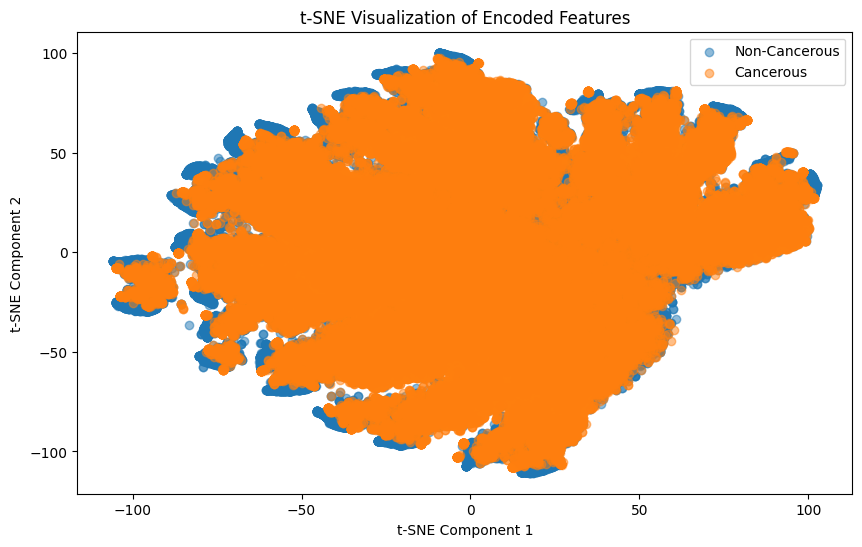

In [ ]:
import torch
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Visualize encoded features using t-SNE
encoded_features = autoencoder.encoder(torch.tensor(train_features_with_labels, dtype=torch.float32).to(device)).cpu().detach().numpy()
tsne = TSNE(n_components=2, random_state=42)
embedded_features = tsne.fit_transform(encoded_features)

train_labels = train_labels.squeeze()  # train_labels is a 1D array

plt.figure(figsize=(10, 6))
plt.scatter(embedded_features[train_labels == 0, 0], embedded_features[train_labels == 0, 1], label='Non-Cancerous', alpha=0.5)
plt.scatter(embedded_features[train_labels == 1, 0], embedded_features[train_labels == 1, 1], label='Cancerous', alpha=0.5)
plt.title('t-SNE Visualization of Encoded Features')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()


Training the autoencoder with EM technique with fuzzy-k-means and tsne

Iteration [1/10], Loss: 388.7542
Iteration [2/10], Loss: 242.0505
Iteration [3/10], Loss: 780.8731
Iteration [4/10], Loss: 330.9006
Iteration [5/10], Loss: 302.2223
Iteration [6/10], Loss: 506.3569
Iteration [7/10], Loss: 305.1601
Iteration [8/10], Loss: 181.2086
Iteration [9/10], Loss: 350.7751
Iteration [10/10], Loss: 199.9644


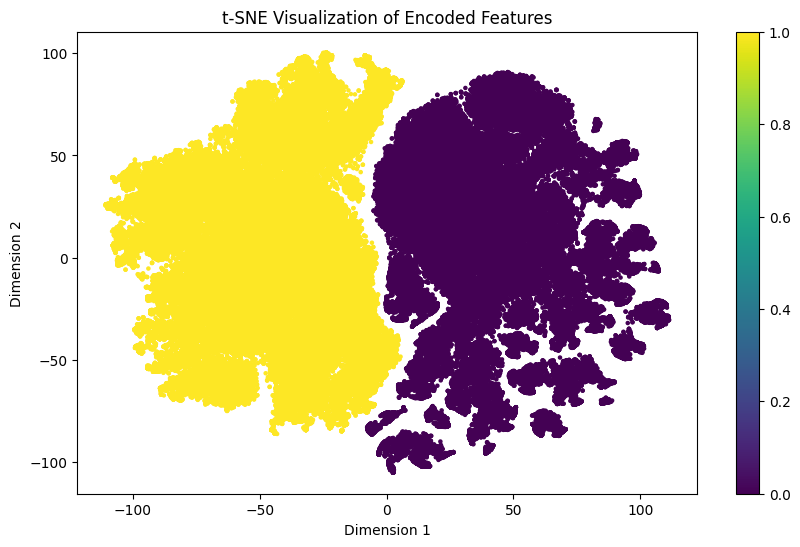

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

class Autoencoder(nn.Module):
    def __init__(self, input_dim, encoding_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.ReLU(True),
            nn.Linear(512, 256),
            nn.ReLU(True),
            nn.Linear(256, encoding_dim),
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 256),
            nn.ReLU(True),
            nn.Linear(256, 512),
            nn.ReLU(True),
            nn.Linear(512, input_dim),
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

def fuzzy_k_means(X, centroids, m=2):
    distances = cdist(X, centroids, 'euclidean')
    distances = np.fmax(distances, np.finfo(np.float64).eps)
    inv_distances = 1.0 / distances
    weights = inv_distances ** (2.0 / (m - 1))
    return weights / weights.sum(axis=1, keepdims=True)

def update_centroids(X, weights, n_clusters):
    return np.dot(weights.T, X) / np.sum(weights, axis=0)[:, None]

def expectation_step(data, autoencoder, n_clusters, device):
    autoencoder.eval()
    with torch.no_grad():
        encoded_features = autoencoder.encoder(torch.tensor(data, dtype=torch.float32).to(device)).cpu().numpy()

    centroids = encoded_features[:n_clusters]  # Initialize centroids
    weights = fuzzy_k_means(encoded_features, centroids)
    return weights, centroids, encoded_features

def maximization_step(train_loader, autoencoder, combined_criterion, optimizer, weights, centroids, encoded_features, n_clusters, device):
    autoencoder.train()

    centroids = update_centroids(encoded_features, weights, n_clusters)

    total_loss = 0.0
    for data, labels in train_loader:
        data = data.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()

        reconstructed = autoencoder(data)

        # Split the data into features and labels
        original_features = data[:, :-1]
        original_labels = data[:, -1].view(-1, 1)
        reconstructed_features = reconstructed[:, :-1]
        reconstructed_labels = reconstructed[:, -1].view(-1, 1)

        # Compute combined loss
        loss = combined_criterion(reconstructed_features, original_features, reconstructed_labels, original_labels)

        # Compute clustering loss
        encoded_data = autoencoder.encoder(data).detach().cpu().numpy()  # Detach the tensor
        batch_size = data.size(0)
        clustering_loss = 0.0

        for i in range(batch_size):
            for j in range(n_clusters):
                clustering_loss += weights[i, j] * torch.norm(torch.tensor(encoded_data[i]).to(device) - torch.tensor(centroids[j]).to(device))

        total_loss = loss + clustering_loss
        total_loss.backward()
        optimizer.step()

    return centroids, total_loss

def combined_criterion(reconstructed_features, original_features, reconstructed_labels, original_labels):
    mse_loss = nn.MSELoss()(reconstructed_features, original_features)
    bce_loss = nn.BCEWithLogitsLoss()(reconstructed_labels, original_labels)
    return mse_loss + bce_loss

def expectation_maximization(train_loader, autoencoder, combined_criterion, optimizer, train_features_with_labels, device, n_clusters=2, max_iterations=10):
    for iteration in range(max_iterations):
        weights, centroids, encoded_features = expectation_step(train_features_with_labels, autoencoder, n_clusters, device)
        centroids, total_loss = maximization_step(train_loader, autoencoder, combined_criterion, optimizer, weights, centroids, encoded_features, n_clusters, device)

        print(f'Iteration [{iteration+1}/{max_iterations}], Loss: {total_loss.item():.4f}')

        if total_loss.item() < 1e-4:
            break

    return autoencoder

def visualize_tsne(autoencoder, data, labels, device):
    autoencoder.eval()
    with torch.no_grad():
        encoded_features = autoencoder.encoder(torch.tensor(data, dtype=torch.float32).to(device)).cpu().numpy()

    tsne = TSNE(n_components=2, random_state=42)
    tsne_results = tsne.fit_transform(encoded_features)

    plt.figure(figsize=(10, 6))
    plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=labels, cmap='viridis', s=5)
    plt.colorbar()
    plt.title('t-SNE Visualization of Encoded Features')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.show()

def main():
    train_features = np.load('/content/drive/MyDrive/features autoencoder/train_features.npy')
    train_labels = np.load('/content/drive/MyDrive/features autoencoder/train_labels.npy')
    val_features = np.load('/content/drive/MyDrive/features autoencoder/val_features.npy')
    val_labels = np.load('/content/drive/MyDrive/features autoencoder/val_labels.npy')
    test_features = np.load('/content/drive/MyDrive/features autoencoder/test_features.npy')
    test_labels = np.load('/content/drive/MyDrive/features autoencoder/test_labels.npy')

    train_features_with_labels = np.hstack((train_features, train_labels.reshape(-1, 1)))
    val_features_with_labels = np.hstack((val_features, val_labels.reshape(-1, 1)))
    test_features_with_labels = np.hstack((test_features, test_labels.reshape(-1, 1)))

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    train_dataset = TensorDataset(torch.tensor(train_features_with_labels, dtype=torch.float32), torch.tensor(train_labels, dtype=torch.float32))
    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

    combined_feature_size = train_features_with_labels.shape[1]
    encoding_dim = 64
    autoencoder = Autoencoder(input_dim=combined_feature_size, encoding_dim=encoding_dim).to(device)
    optimizer = optim.Adam(autoencoder.parameters(), lr=1e-3)

    # Run EM algorithm
    trained_model = expectation_maximization(train_loader, autoencoder, combined_criterion, optimizer, train_features_with_labels, device)

    torch.save(trained_model.state_dict(), 'em_trained_model12.pth')

    # Visualize with t-SNE
    visualize_tsne(trained_model, test_features_with_labels, test_labels, device)

if __name__ == "__main__":
    main()


Training the autoencoder with EM technique with k-means and tsne

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration [1/20], Loss: 388.1799


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration [2/20], Loss: 621.6594


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration [3/20], Loss: 406.7617


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration [4/20], Loss: 186.6673


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration [5/20], Loss: 79.9882


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration [6/20], Loss: 86.3405


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration [7/20], Loss: 358.0584


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration [8/20], Loss: 91.7743


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration [9/20], Loss: 87.1082


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration [10/20], Loss: 294.5175


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration [11/20], Loss: 74.5352


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration [12/20], Loss: 76.0854


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration [13/20], Loss: 68.0118


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration [14/20], Loss: 351.8897


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration [15/20], Loss: 85.6908


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration [16/20], Loss: 269.5909


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration [17/20], Loss: 76.6822


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration [18/20], Loss: 222.0465


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration [19/20], Loss: 175.4628


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration [20/20], Loss: 57.0105


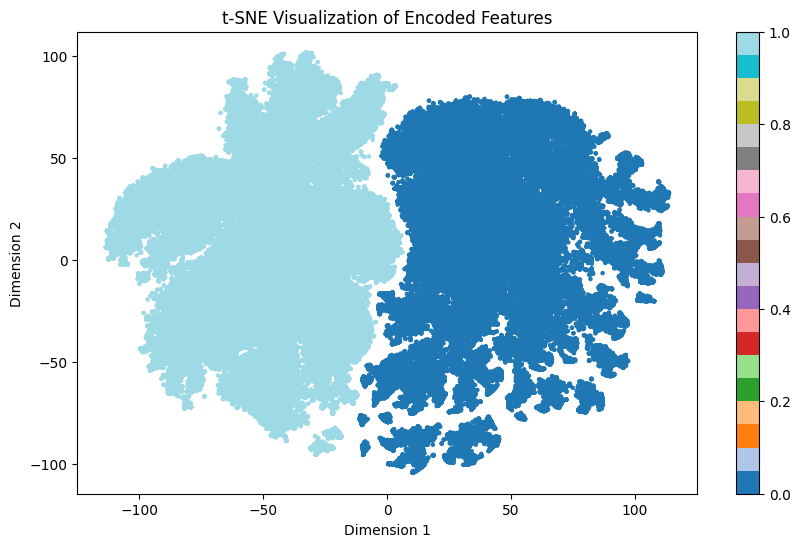

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

class Autoencoder(nn.Module):
    def __init__(self, input_dim, encoding_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.ReLU(True),
            nn.Linear(512, 256),
            nn.ReLU(True),
            nn.Linear(256, encoding_dim),
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 256),
            nn.ReLU(True),
            nn.Linear(256, 512),
            nn.ReLU(True),
            nn.Linear(512, input_dim),
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

def k_means(X, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    return kmeans.labels_, kmeans.cluster_centers_

def expectation_step(data, autoencoder, n_clusters, device):
    autoencoder.eval()
    with torch.no_grad():
        encoded_features = autoencoder.encoder(torch.tensor(data, dtype=torch.float32).to(device)).cpu().numpy()

    labels, centroids = k_means(encoded_features, n_clusters)
    return labels, centroids, encoded_features

def maximization_step(train_loader, autoencoder, combined_criterion, optimizer, labels, centroids, encoded_features, n_clusters, device):
    autoencoder.train()

    total_loss = 0.0
    for data, labels in train_loader:
        data = data.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()

        reconstructed = autoencoder(data)

        # Split the data into features and labels
        original_features = data[:, :-1]
        original_labels = data[:, -1].view(-1, 1)
        reconstructed_features = reconstructed[:, :-1]
        reconstructed_labels = reconstructed[:, -1].view(-1, 1)

        # Compute combined loss
        loss = combined_criterion(reconstructed_features, original_features, reconstructed_labels, original_labels)

        # Compute clustering loss
        encoded_data = autoencoder.encoder(data).detach().cpu().numpy()  # Detach the tensor
        batch_size = data.size(0)
        clustering_loss = 0.0

        for i in range(batch_size):
            clustering_loss += np.min(np.linalg.norm(encoded_data[i] - centroids, axis=1))

        total_loss = loss + clustering_loss
        total_loss.backward()
        optimizer.step()

    return centroids, total_loss

def combined_criterion(reconstructed_features, original_features, reconstructed_labels, original_labels):
    mse_loss = nn.MSELoss()(reconstructed_features, original_features)
    bce_loss = nn.BCEWithLogitsLoss()(reconstructed_labels, original_labels)
    return mse_loss + bce_loss

def expectation_maximization(train_loader, autoencoder, combined_criterion, optimizer, train_features_with_labels, device, n_clusters=20, max_iterations=20):
    for iteration in range(max_iterations):
        labels, centroids, encoded_features = expectation_step(train_features_with_labels, autoencoder, n_clusters, device)
        centroids, total_loss = maximization_step(train_loader, autoencoder, combined_criterion, optimizer, labels, centroids, encoded_features, n_clusters, device)

        print(f'Iteration [{iteration+1}/{max_iterations}], Loss: {total_loss.item():.4f}')

        if total_loss.item() < 1e-4:
            break

    return autoencoder

def visualize_tsne(autoencoder, data, labels, device):
    autoencoder.eval()
    with torch.no_grad():
        encoded_features = autoencoder.encoder(torch.tensor(data, dtype=torch.float32).to(device)).cpu().numpy()

    tsne = TSNE(n_components=2, random_state=42)
    tsne_results = tsne.fit_transform(encoded_features)

    plt.figure(figsize=(10, 6))
    plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=labels, cmap='tab20', s=5)
    plt.colorbar()
    plt.title('t-SNE Visualization of Encoded Features')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.show()

def main():
    train_features = np.load('/content/drive/MyDrive/features autoencoder/train_features.npy')
    train_labels = np.load('/content/drive/MyDrive/features autoencoder/train_labels.npy')
    val_features = np.load('/content/drive/MyDrive/features autoencoder/val_features.npy')
    val_labels = np.load('/content/drive/MyDrive/features autoencoder/val_labels.npy')
    test_features = np.load('/content/drive/MyDrive/features autoencoder/test_features.npy')
    test_labels = np.load('/content/drive/MyDrive/features autoencoder/test_labels.npy')

    train_features_with_labels = np.hstack((train_features, train_labels.reshape(-1, 1)))
    val_features_with_labels = np.hstack((val_features, val_labels.reshape(-1, 1)))
    test_features_with_labels = np.hstack((test_features, test_labels.reshape(-1, 1)))

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    train_dataset = TensorDataset(torch.tensor(train_features_with_labels, dtype=torch.float32), torch.tensor(train_labels, dtype=torch.float32))
    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

    combined_feature_size = train_features_with_labels.shape[1]
    encoding_dim = 64
    autoencoder = Autoencoder(input_dim=combined_feature_size, encoding_dim=encoding_dim).to(device)
    optimizer = optim.Adam(autoencoder.parameters(), lr=1e-3)

    # Run EM algorithm with K-Means clustering
    trained_model = expectation_maximization(train_loader, autoencoder, combined_criterion, optimizer, train_features_with_labels, device)

    torch.save(trained_model.state_dict(), 'em_trained_model_kmeans.pth')

    # Visualize with t-SNE
    visualize_tsne(trained_model, test_features_with_labels, test_labels, device)

if __name__ == "__main__":
    main()
